In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(('ignore'))

In [122]:
!pip install pingouin
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE

ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [7]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

### DROPING SOME DATA FROM COLUMNS

In [8]:
data.drop(['other_fuel1',                 
'other_fuel2',                
'other_fuel3',                 
'commissioning_year',          
'owner',
'wepp_id',                     
'year_of_capacity_data',       
'generation_gwh_2013',         
'generation_gwh_2014',         
'generation_gwh_2015',         
'generation_gwh_2016',         
'generation_gwh_2017',         
'generation_data_source',      
'estimated_generation_gwh','url'],axis=1,inplace=True)

In [9]:
data.describe()

,capacity_mw,latitude,longitude
count,908.000000,862.000000,862.000000
mean,321.046378,21.196189,77.447848
std,580.221767,6.248627,4.907260
min,0.000000,8.168900,68.644700
25%,16.837500,16.771575,74.258975
50%,60.000000,21.778300,76.719250
75%,388.125000,25.516375,79.441475
max,4760.000000,34.649000,95.408000


In [10]:
data.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [11]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source'],
      dtype='object')

In [12]:
data.shape

(908, 10)

#### MISSING VALUES FILLED BY LATITUDE AS WELL AS LONGITUDE AS -1

In [13]:
data['latitude']=data['latitude'].fillna("-1")

In [14]:
data['longitude']=data['longitude'].fillna("-1")

In [15]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [16]:
data.isna().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

#### ALL THE MISSING VALUES REMOVED

In [17]:
data['gppd_idnr']=data['gppd_idnr'].str[:3]

In [18]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI
906,IND,India,ZAWAR MINES,WRI,80.0,24.35,73.7477,Coal,Hindustan Zinc ltd,WRI


In [123]:
import pingouin as pg

In [20]:
data.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI


In [124]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [22]:
mod = ols('capacity_mw ~ source', data=data).fit()

In [23]:
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
source,5.812254e+07,190.0,0.88719,0.841865
Residual,2.472256e+08,717.0,NaN,NaN


In [24]:
expected, observed, stats=pg.chi2_independence(data, y='source',x='primary_fuel')

In [25]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3368.508632,1330.0,5.388434e-177,0.727992,1.000000
1,cressie-read,0.666667,2480.794627,1330.0,2.513939e-72,0.624746,0.999995
2,log-likelihood,0.000000,1981.906519,1330.0,1.362704e-28,0.558405,0.999560
3,freeman-tukey,-0.500000,NaN,1330.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,1330.0,0.000000e+00,inf,1.000000
5,neyman,-2.000000,NaN,1330.0,NaN,NaN,NaN


## EDA
### Univariate Analysis

In [26]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.609,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [27]:
cols=['country','country_long','gppd_idnr','primary_fuel','geolocation_source']

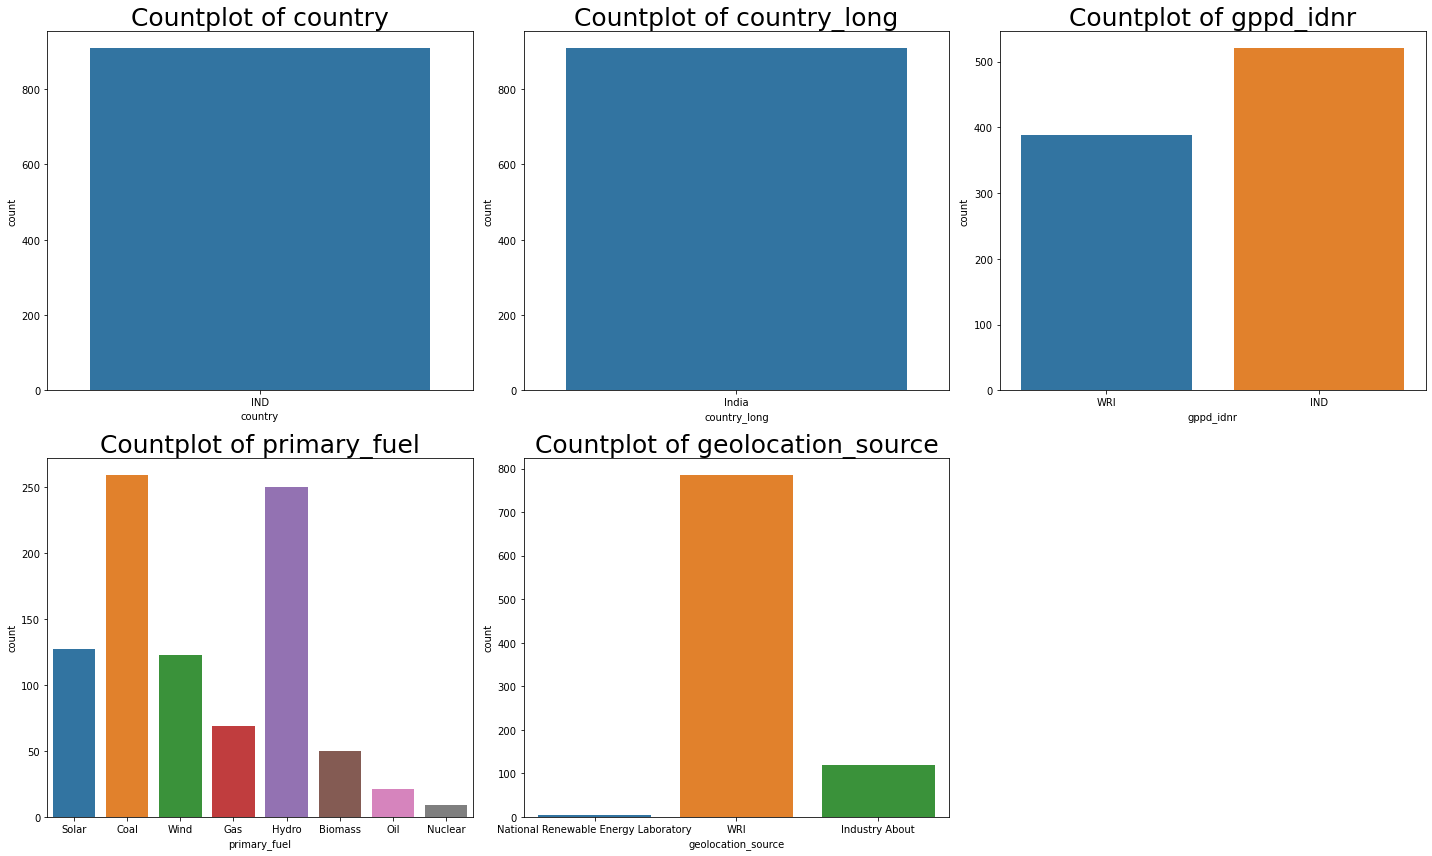

In [28]:
plt.figure(figsize=(20,12))
for i in range(0,len(cols)):
  plt.subplot(2,3,i+1)
  sns.countplot(data[cols[i]])
  plt.title(f"Countplot of {cols[i]}",fontsize=25)
  plt.tight_layout()

> COUNTRY AND COUNTRY_LONG HAS ONLY ONE VARIABLE.

> IND IS GREATER THAN WRI.

> COAL AND HYDRO FUEL IS HAVING HIGH USAGE WHEREAS NUCLEAR AND OIL ARE HAVING LEAST USAGE.

> WRI HAS HIGHEST COUNT WHEREAS NATIONAL RENEWABLE ENERGY LABORATORY HAS LEAST.


In [29]:
col1=['capacity_mw','latitude','longitude']

## DISTRIBUTION OF CONTINOUS VALUES 

Text(0.5, 1.0, 'Distribution of longitude')

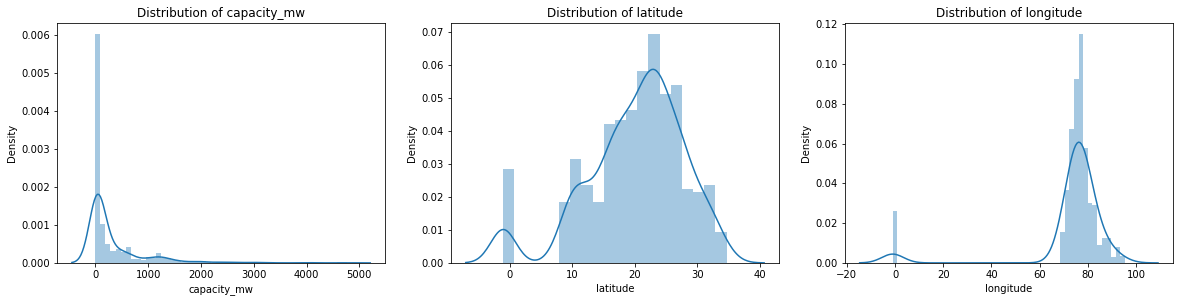

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data['capacity_mw'])
plt.title("Distribution of capacity_mw")
plt.subplot(3,3,2)
sns.distplot(data['latitude'])
plt.title("Distribution of latitude")
plt.subplot(3,3,3)
sns.distplot(data['longitude'])
plt.title("Distribution of longitude")

# Observation
#### 1-From distribution of capacity_mw i can say it has high left peak.

#### 2-From latitude i can say it is has only some data point only in middle that is can say middle peak only.

#### 3-From distribution of longitude i can say has right peak only.

# BIVARIATE ANALYSIS

In [125]:
from scipy.stats import norm

In [32]:
data['longitude']=data['longitude'].astype(float)

In [33]:
data['latitude']=data['latitude'].astype(float)

In [34]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [35]:
col2=['country', 'country_long', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'geolocation_source']

# Effect of all features on capacity

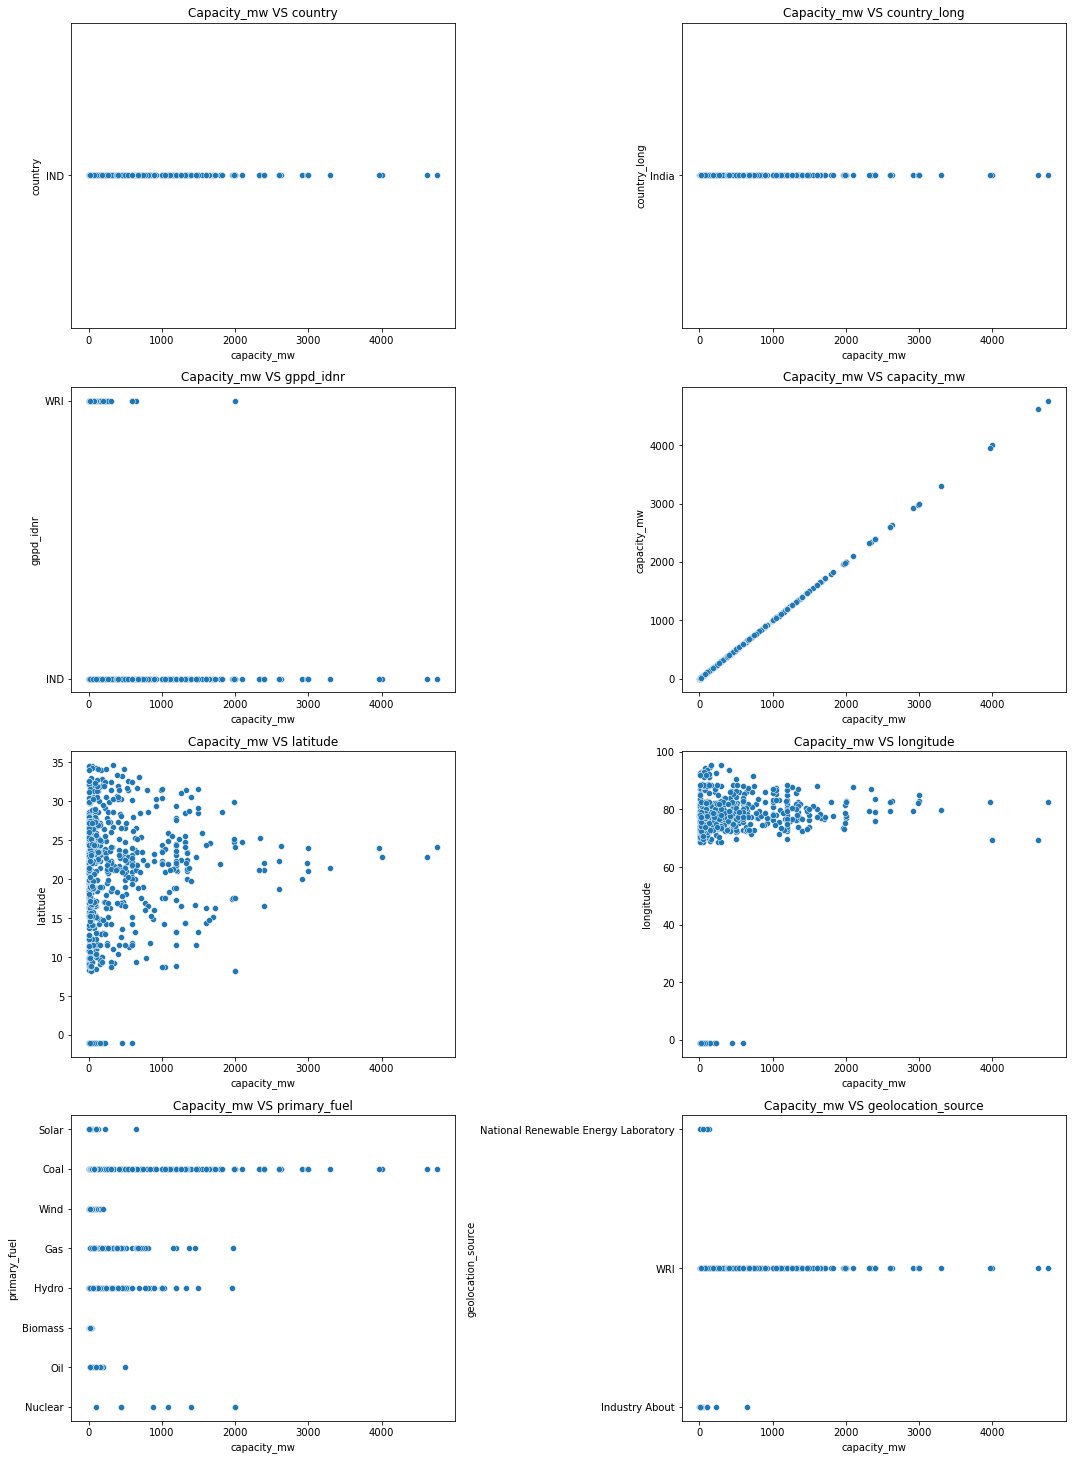

In [36]:
plt.figure(figsize=(15,25))
for i in range(0,len(col2)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data['capacity_mw'],y=data[col2[i]])
  plt.title(f"Capacity_mw VS {col2[i]}")
  plt.tight_layout()

# Observation
1-From gppd_idnr i can say as the capacity is increasing the gppd_idnr is also iscreasing mostly for IND.

2-From capacity_mw i can say as the capacity is increasing more the value of primary_fuel is increasing means consumption of fuel is increasing.

3-From geolocation_source i can say as the capacity_mw is increasing the value of WRI(Word Resource institute) is only increasing.

4-From other graph i can say there is no value means only one value is there so can not predict anything.

# Effect of all features on primary fuel

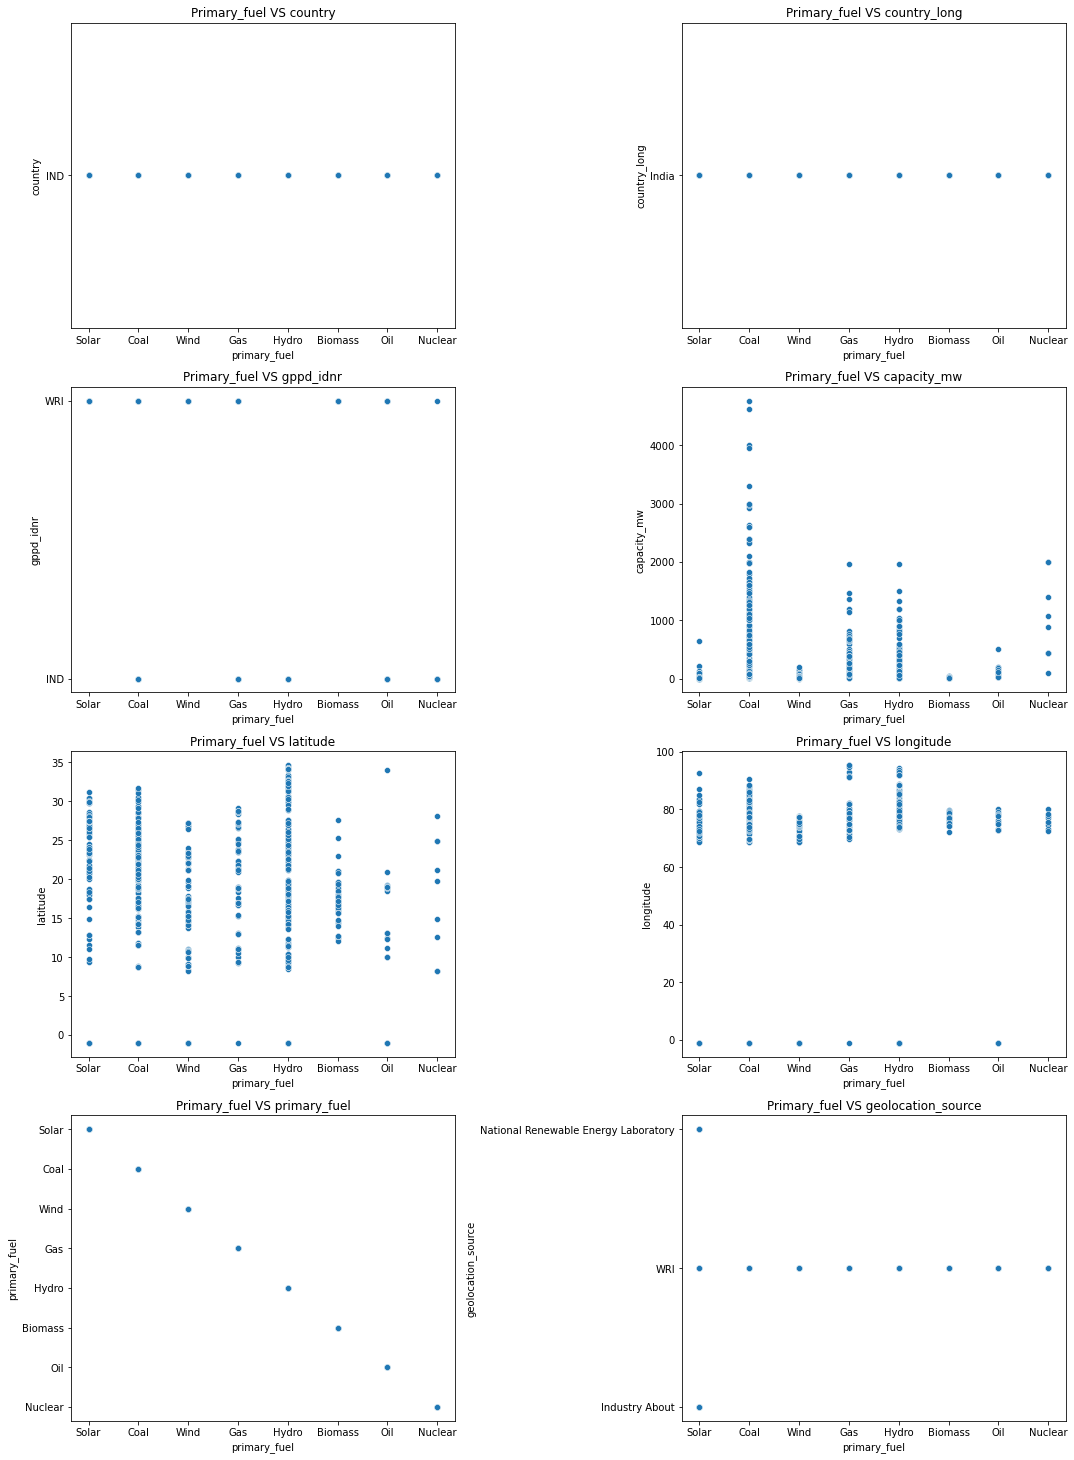

In [37]:
plt.figure(figsize=(15,25))
for i in range(0,len(col2)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data['primary_fuel'],y=data[col2[i]])
  plt.title(f"Primary_fuel VS {col2[i]}")
  plt.tight_layout()

In [38]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'VINDH_CHAL STPS'),
  Text(1, 0, 'MUNDRA TPP'),
  Text(2, 0, 'MUNDRA UMPP'),
  Text(3, 0, 'SASAN UMPP'),
  Text(4, 0, 'TIRORA TPP'),
  Text(5, 0, 'TALCHER STPS'),
  Text(6, 0, 'RIHAND'),
  Text(7, 0, 'SIPAT STPS'),
  Text(8, 0, 'CHANDRAPUR_Coal'),
  Text(9, 0, 'ANPARA')])

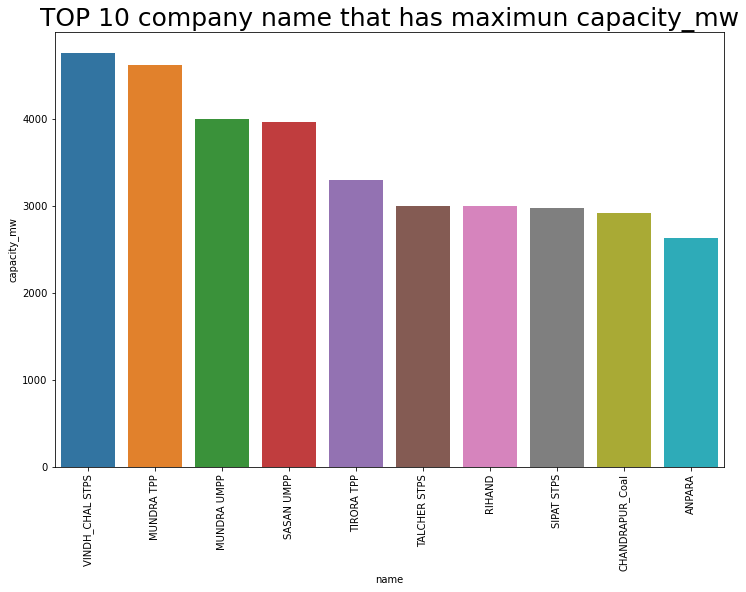

In [39]:
data1=data.groupby('name')['capacity_mw'].sum()
data1=data1.reset_index()
data1=data1.sort_values(by=('capacity_mw'),ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=data1.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=25)
plt.xticks(rotation=90)

vindh_chal_stps is the top most compant that has maximun no. of capacity_mw as top 10 and from upper figure i can see all the 10 company name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Sai Sulphonates Wind Mill'),
  Text(1, 0, 'Phagi Solar Power Plant'),
  Text(2, 0, 'Bonada Solar Power Plant'),
  Text(3, 0, 'Bamanwali Solar Power Plant'),
  Text(4, 0, 'Khirwa Solar Power Plant'),
  Text(5, 0, 'Komal West Solar Power Plant'),
  Text(6, 0, 'Amarsar Solar Power Plant'),
  Text(7, 0, 'Rasulpur Solar Power Plant'),
  Text(8, 0, 'Bamani Solar Power Plant'),
  Text(9, 0, 'Mirpur Kalan - Nexgen Solux Solar Power Plant'),
  Text(10, 0, 'Sadeipali - REHPL Solar Power Plant'),
  Text(11, 0, 'Patodi Solar Power Plant'),
  Text(12, 0, 'Isanpur Solar Power Plant'),
  Text(13, 0, 'Dugar Solar Power Plant'),
  Text(14, 0, 'Godelai Solar Power Plant'),
  Text(15, 0, 'Lallian Kalan Solar Power Plant'),
  Text(16, 0, 'Gandhinagar Solar Power Plant'),
  Text(17, 0, 'Lathi Solar Power Plant'),
  Text(18, 0, 'Belagau Wind Farm'),
  Text(19, 0, 'Tata BP - Electronics City Solar 

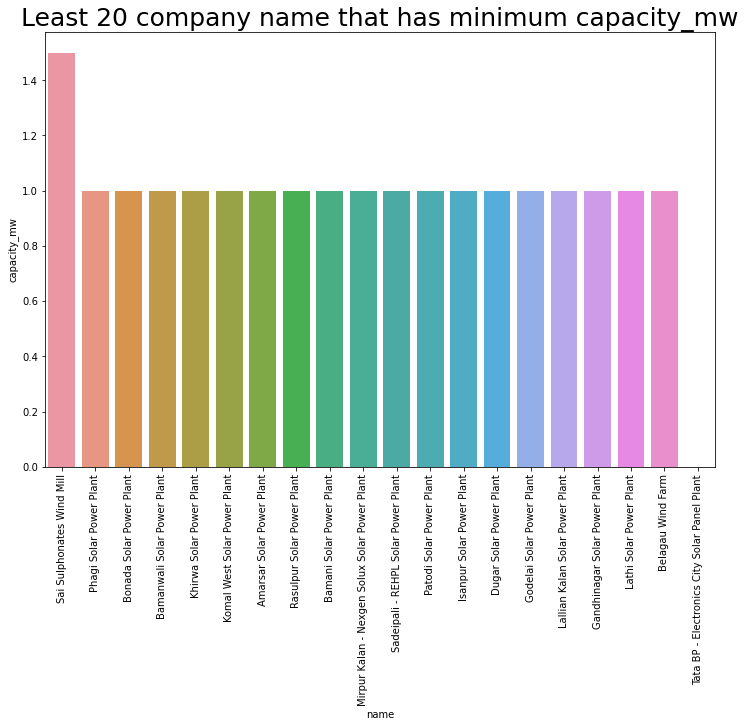

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=data1.tail(20))
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Central Electricity Authority'),
  Text(1, 0, 'IAEA'),
  Text(2, 0, 'Adani Power Limite r Er'),
  Text(3, 0, 'Dhariwal Pvt ltd'),
  Text(4, 0, 'Hindustan Pvt lt'),
  Text(5, 0, 'Shree Cement ltd'),
  Text(6, 0, 'Rattanindia Power ltd'),
  Text(7, 0, 'Ideal Projects ltd'),
  Text(8, 0, 'Hindustan Zinc ltd'),
  Text(9, 0, 'Solar for India'),
  Text(10, 0, 'CDM'),
  Text(11, 0, 'Mangalore & petrochem'),
  Text(12, 0, 'Jaypee Ltd jccl)'),
  Text(13, 0, 'National Renewable Energy Laboratory'),
  Text(14, 0, 'Dcm & chem'),
  Text(15, 0, 'Gupta Ltd gepl)'),
  Text(16, 0, 'Reliance Power Ltd'),
  Text(17, 0, 'Maharashtra State Power Generation Co Ltd (MAHAGENCO)'),
  Text(18, 0, 'Bharat Refinery ltd'),
  Text(19, 0, 'Ultratech Cement ltd')])

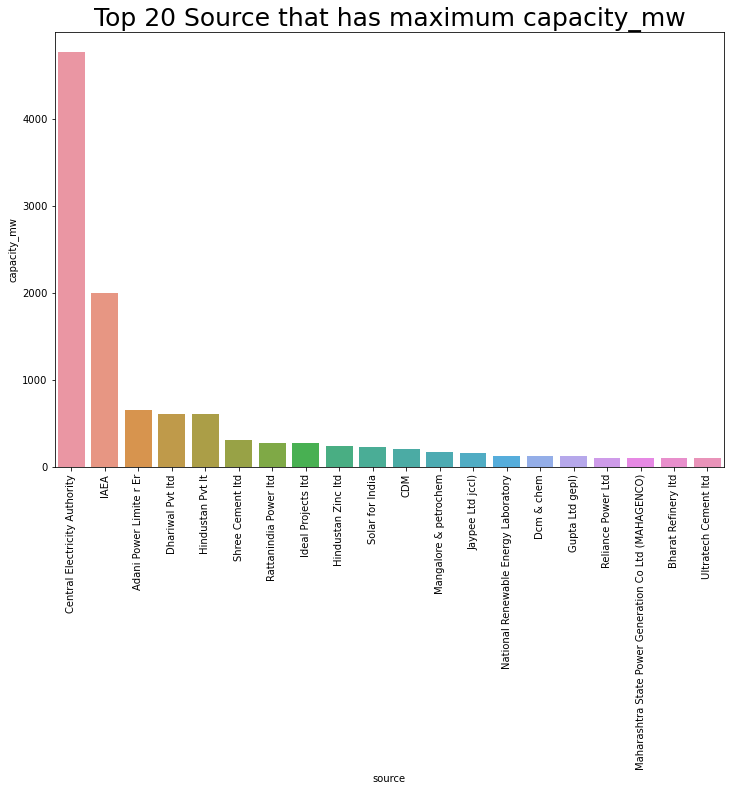

In [42]:
data2=data.groupby('source')['capacity_mw'].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('capacity_mw'),ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=data2.head(20))
plt.title("Top 20 Source that has maximum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

Central electricity authority has the higher capacity_mw value with the value of more then 4000 & ultratech cement has the lowest value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CleanEnerg teLeanenergy'),
  Text(1, 0, 'Powers Private'),
  Text(2, 0, 'PEDA'),
  Text(3, 0, 'Real Estate e'),
  Text(4, 0, 'West Bengal Energy Development Corporation Limited (WBEDCL)'),
  Text(5, 0, 'Clover Solar Private Limited (CSPL)'),
  Text(6, 0, 'Sepset Constructio te'),
  Text(7, 0, 'Astonfield Management Limited'),
  Text(8, 0, 'Solaer'),
  Text(9, 0, 'S Limited Rsolar'),
  Text(10, 0, 'AES Winfra'),
  Text(11, 0, 'Ambed K Sugar'),
  Text(12, 0, 'Power Private edM/Pdf'),
  Text(13, 0, 'Raajratna Energy Holdings Private Limited (REHPL)'),
  Text(14, 0, 'Sovox Renewables Private Limited'),
  Text(15, 0, 'Infratech e M/Pdf'),
  Text(16, 0, 'Navbharat'),
  Text(17, 0, 'Harsha Engineers Limited'),
  Text(18, 0, 'Pandit Deendayal Petrolium University (PDPU)'),
  Text(19, 0, 'Tata BP Solar India Limited')])

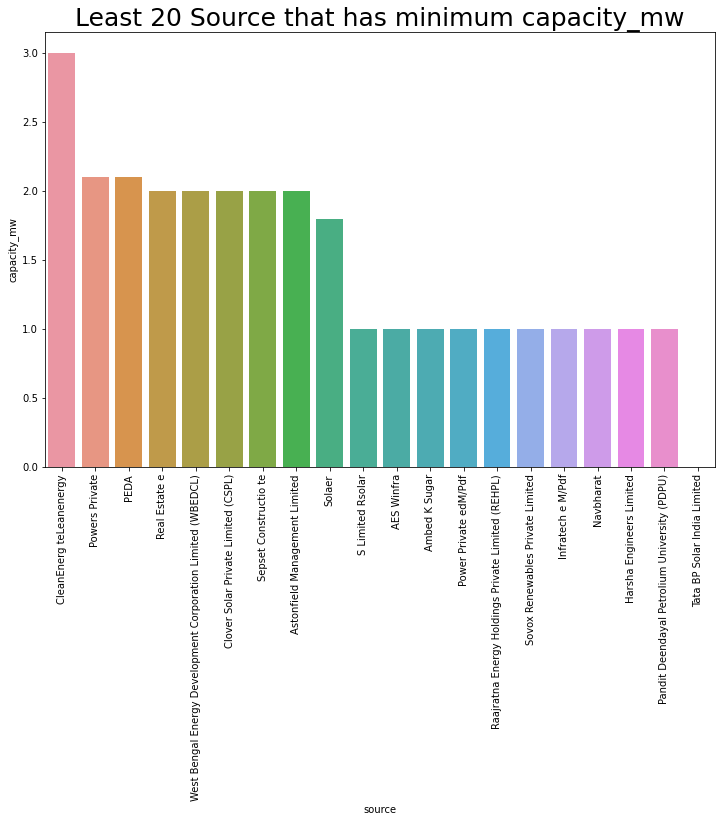

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=data2.tail(20))
plt.title("Least 20 Source that has minimum capacity_mw",fontsize=25)
plt.xticks(rotation=90)

The least 20 source as the has the lowest value of capacity.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India Ltd icl)'),
  Text(1, 0, 'Jai Industries ltd'),
  Text(2, 0, 'Janki Corp ltd'),
  Text(3, 0, 'Kesoram Industries ltd'),
  Text(4, 0, 'Vikram Vikram cement')])

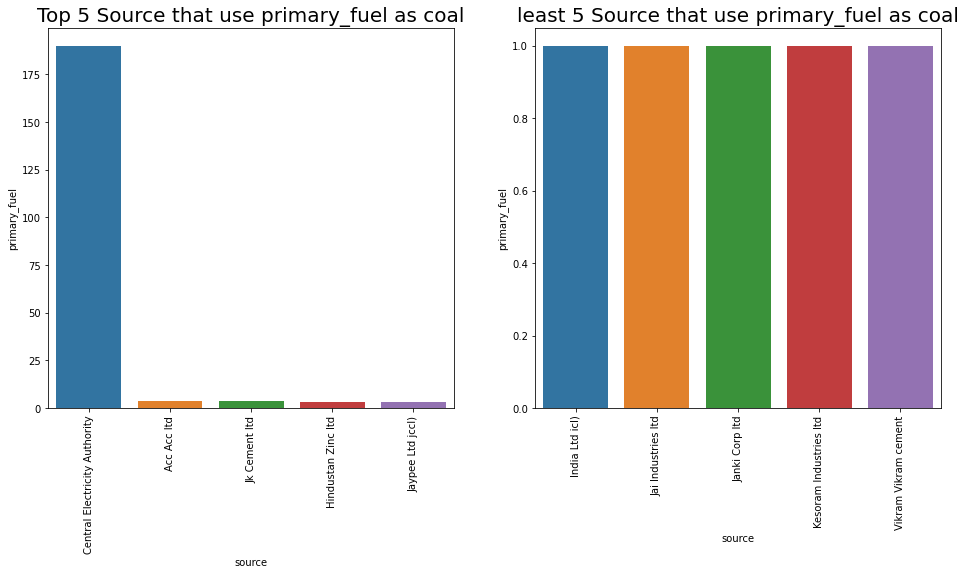

In [44]:
data0=data[data['primary_fuel']=='Coal']
data4=data0.groupby('source')['primary_fuel'].count()
data4=data4.reset_index()
data4=data4.sort_values(by=('primary_fuel'),ascending=False)
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(x='source',y='primary_fuel',data=data4.head(5))
plt.title("Top 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='source',y='primary_fuel',data=data4.tail(5))
plt.title("least 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90)

From top source i can say central electricity use the coal at very high level.

In [45]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [46]:
!pip install reverse_geocoder

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=d89a2c17095eaaf831db2a5762558a9ebb90c85c07e9ef8a8502d36c9670a5a2
  Stored in directory: c:\users\r p shukla\appdata\local\pip\cache\wheels\65\42\5e\223fcd5dc869ff98d5ee6b19e236f82828e4e3c039328ebe20
Successfully built reverse-geocoder


In [47]:
import reverse_geocoder as rg
import pprint
data00=[]
def reverseGeocode(coordinates):
  result=rg.search(coordinates)
  return (result)
if __name__=="__main__":
  coordinates=list(zip(data['latitude'],data['longitude']))
  data12=reverseGeocode(coordinates)
  data00.append(data12)

new_data=pd.DataFrame(data00).transpose()

Loading formatted geocoded file...


In [48]:
data.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI


# Feature Engineering

In [49]:
data['state']=new_data[0].apply(lambda x:x.get('admin1'))
data['Country']=new_data[0].apply(lambda x:x.get('cc'))
data_Coal=data[data['primary_fuel']=='Coal']
data_Hydro=data[data['primary_fuel']=='Hydro']
data_Solar=data[data['primary_fuel']=='Solar']
data_Wind=data[data['primary_fuel']=='Wind']
data_Gas=data[data['primary_fuel']=='Gas']
data_Biomass=data[data['primary_fuel']=='Biomass']
data_Oil=data[data['primary_fuel']=='Oil']

data5=data_Coal.groupby('source')['primary_fuel'].count()
data5=data5.reset_index()
data5=data5.sort_values(by=('primary_fuel'),ascending=False)

data6=data_Hydro.groupby('source')['primary_fuel'].count()
data6=data6.reset_index()
data6=data6.sort_values(by=('primary_fuel'),ascending=False)

data7=data_Solar.groupby('source')['primary_fuel'].count()
data7=data7.reset_index()
data7=data7.sort_values(by=('primary_fuel'),ascending=False)

data8=data_Wind.groupby('source')['primary_fuel'].count()
data8=data8.reset_index()
data8=data8.sort_values(by=('primary_fuel'),ascending=False)

data9=data_Gas.groupby('source')['primary_fuel'].count()
data9=data9.reset_index()
data9=data9.sort_values(by=('primary_fuel'),ascending=False)

data10=data_Biomass.groupby('source')['primary_fuel'].count()
data10=data10.reset_index()
data10=data10.sort_values(by=('primary_fuel'),ascending=False)

data11=data_Oil.groupby('source')['primary_fuel'].count()
data11=data11.reset_index()
data11=data11.sort_values(by=('primary_fuel'),ascending=False)

# Top 5 source that use different type of fuels

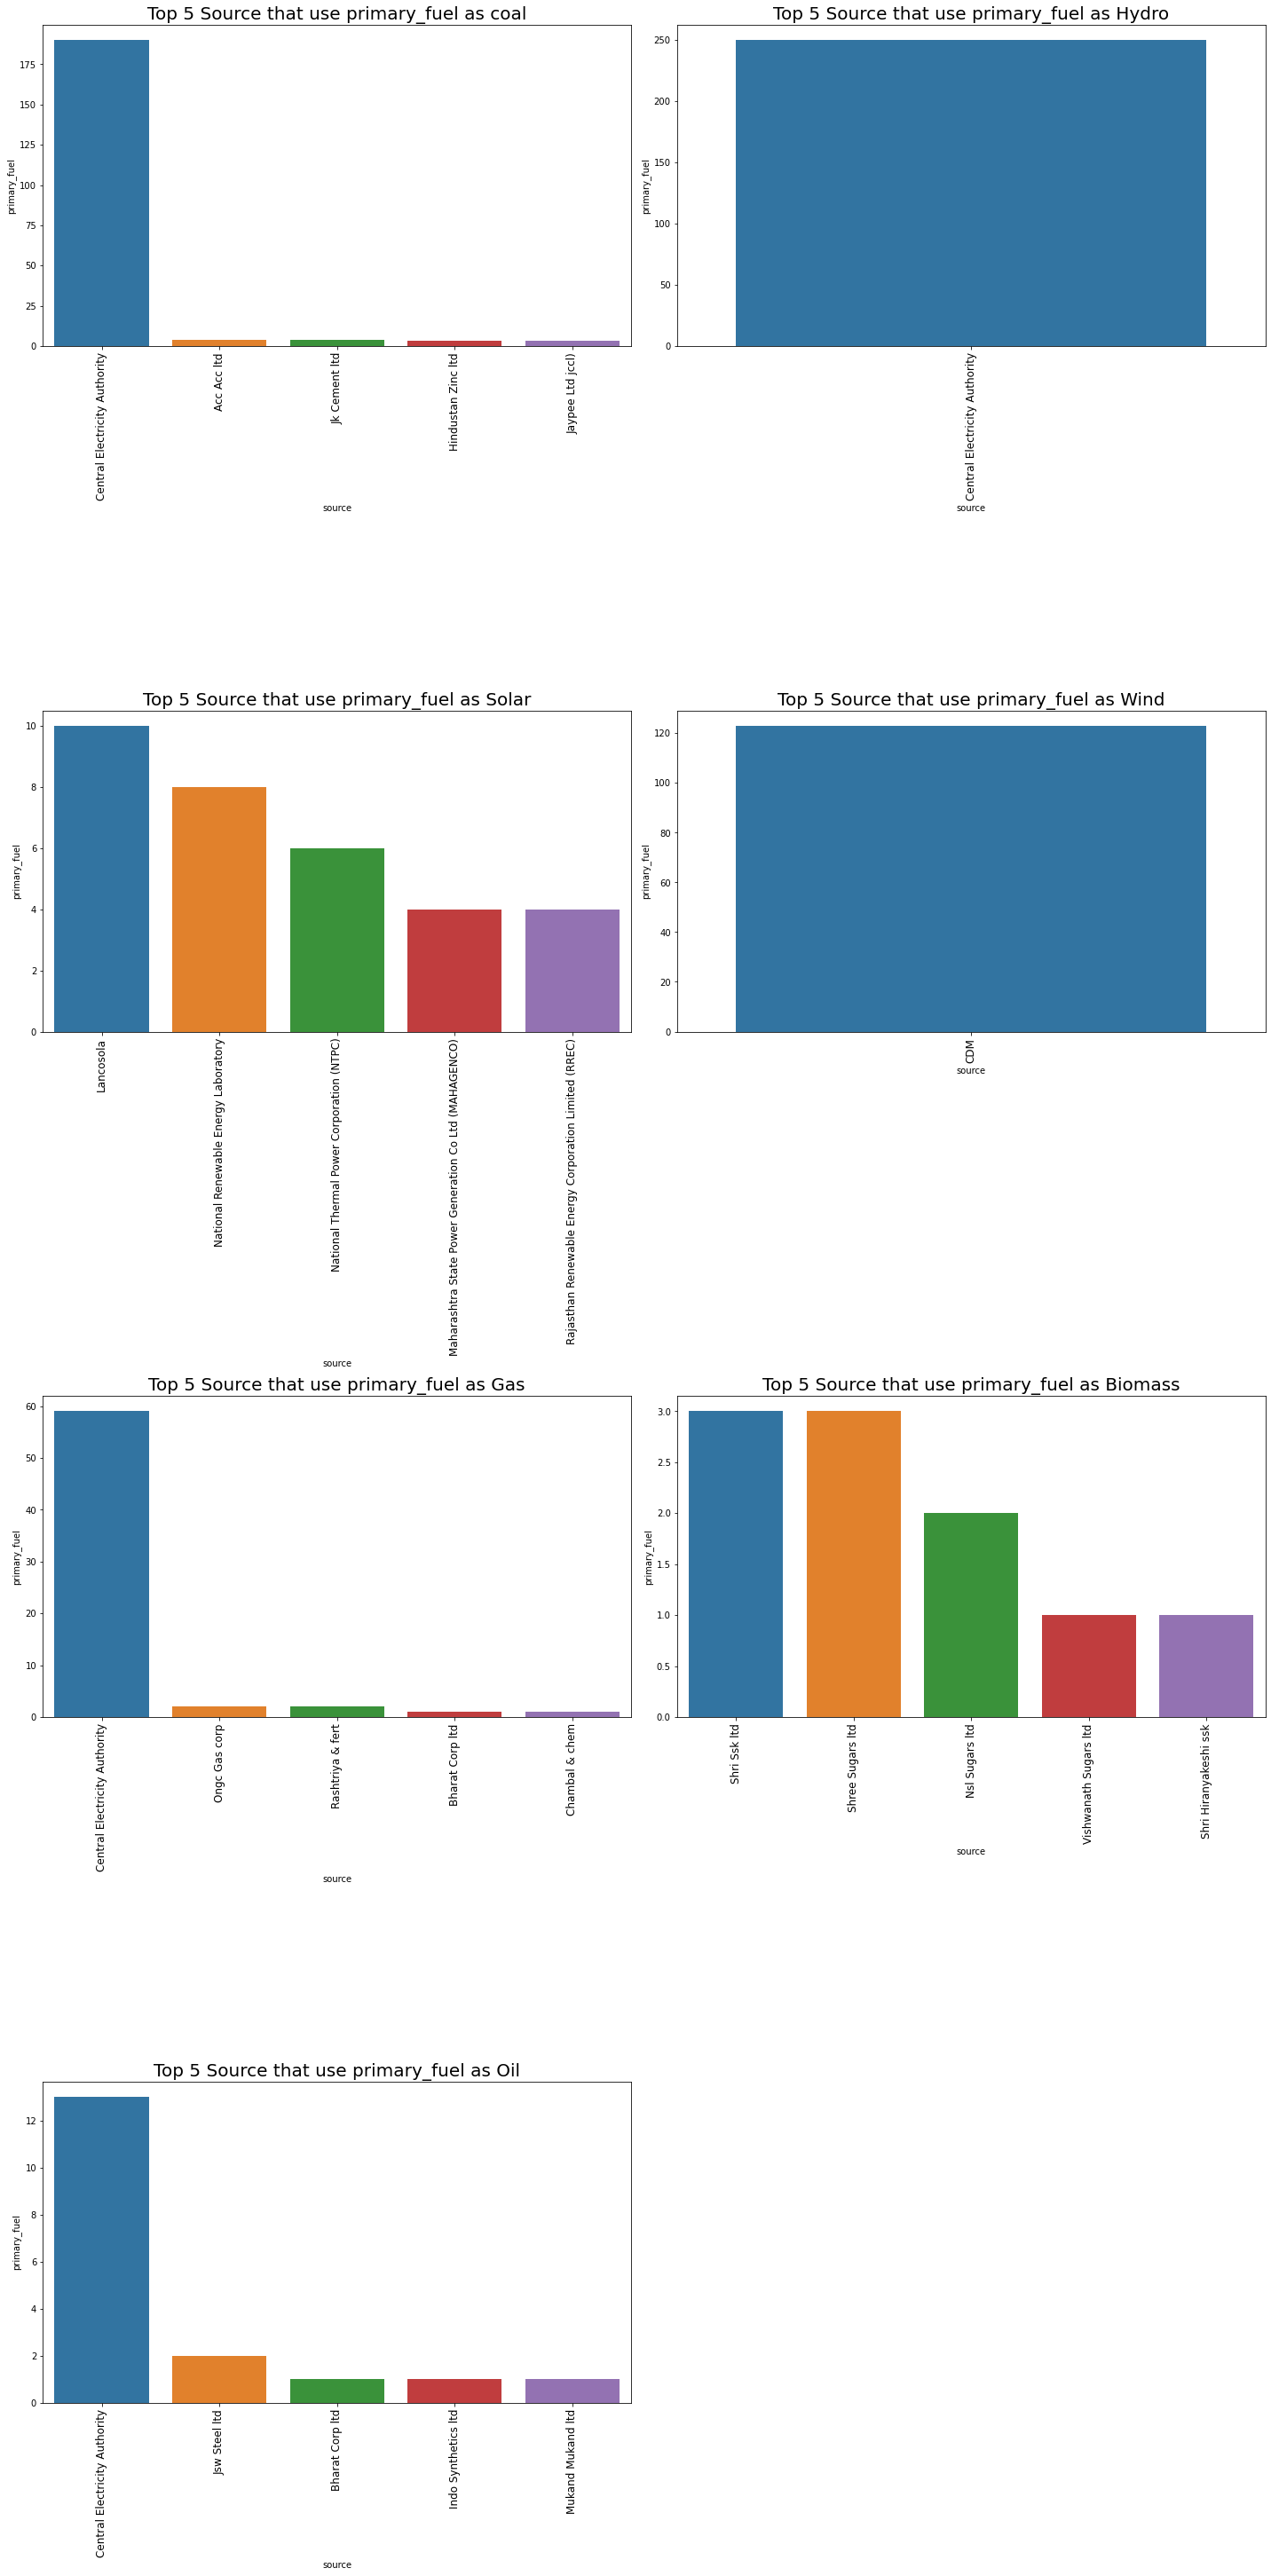

In [50]:
plt.figure(figsize=(20,70))
plt.subplot(7,2,1)
sns.barplot(x='source',y='primary_fuel',data=data5.head(5))
plt.title("Top 5 Source that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,2)
sns.barplot(x='source',y='primary_fuel',data=data6.head(5))
plt.title("Top 5 Source that use primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,3)
sns.barplot(x='source',y='primary_fuel',data=data7.head(5))
plt.title("Top 5 Source that use primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,4)
sns.barplot(x='source',y='primary_fuel',data=data8.head(5))
plt.title("Top 5 Source that use primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,5)
sns.barplot(x='source',y='primary_fuel',data=data9.head(5))
plt.title("Top 5 Source that use primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,6)
sns.barplot(x='source',y='primary_fuel',data=data10.head(5))
plt.title("Top 5 Source that use primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(7,2,7)
sns.barplot(x='source',y='primary_fuel',data=data11.head(5))
plt.title("Top 5 Source that use primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()

<AxesSubplot:ylabel='capacity_mw'>

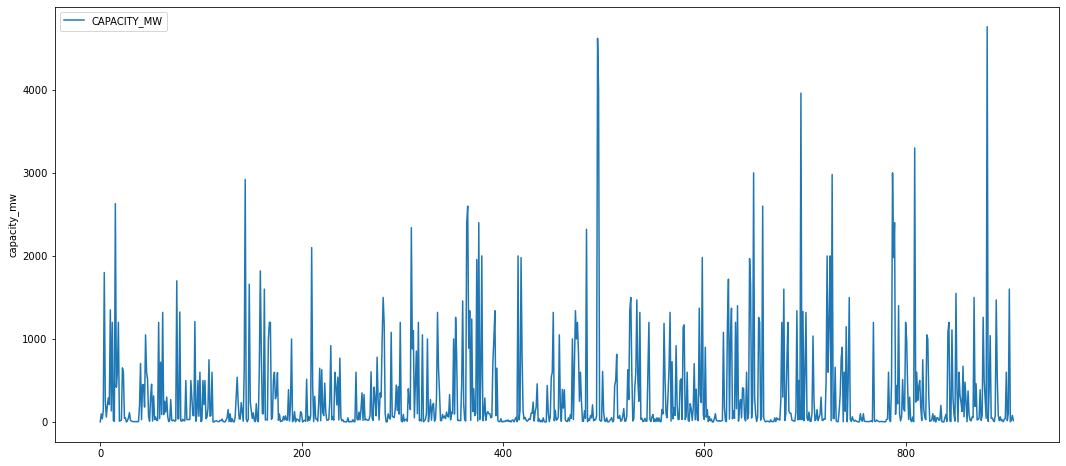

In [51]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data['capacity_mw'],label='CAPACITY_MW')

There is no increase of flow in capacity W.R.T. time.

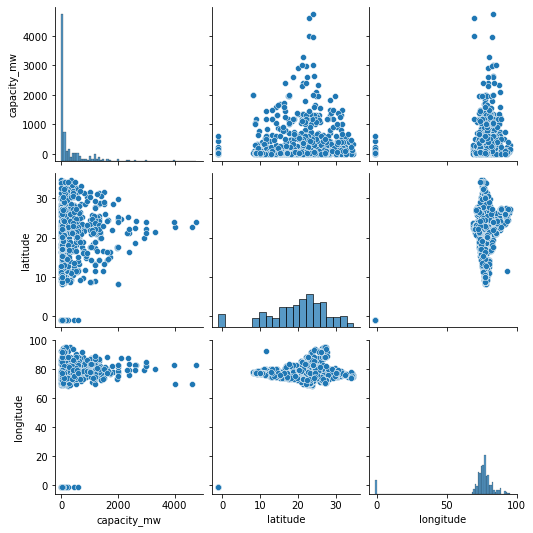

In [52]:
sns.pairplot(data)

In [53]:
!pip install reverse_geocoder

In [54]:
data_state=data.groupby('state')['capacity_mw'].sum()
data_state=data_state.reset_index()
data_state=data_state.sort_values(by=('capacity_mw'),ascending=False)

# Top 10 state that has high capacity_mw

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arunachal Pradesh'),
  Text(1, 0, 'Western Region'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Nagaland'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Samchi'),
  Text(8, 0, 'Pondicherry'),
  Text(9, 0, 'Andaman and Nicobar Islands')])

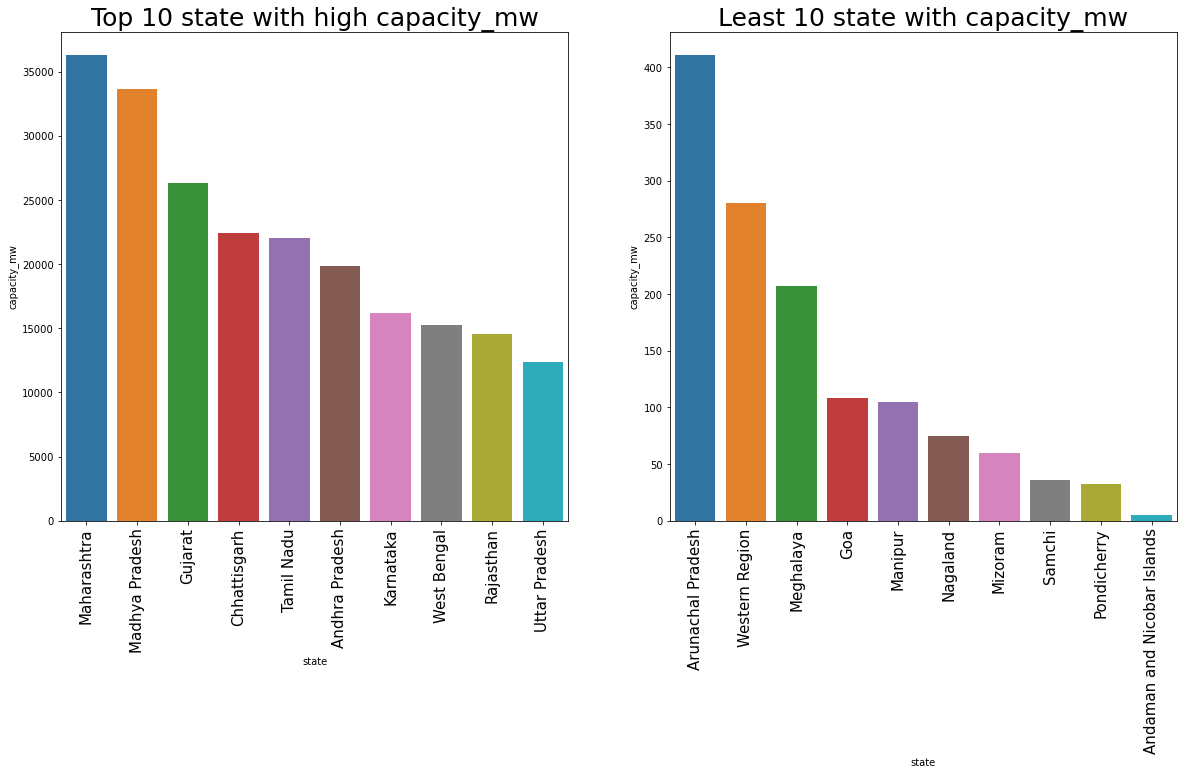

In [55]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
sns.barplot(x='state',y='capacity_mw',data=data_state.head(10))
plt.title("Top 10 state with high capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='state',y='capacity_mw',data=data_state.tail(10))
plt.title("Least 10 state with capacity_mw",fontsize=25)
plt.xticks(rotation=90,fontsize=15)

In [56]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,IN
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,IN
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,IN
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,IN
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,IN


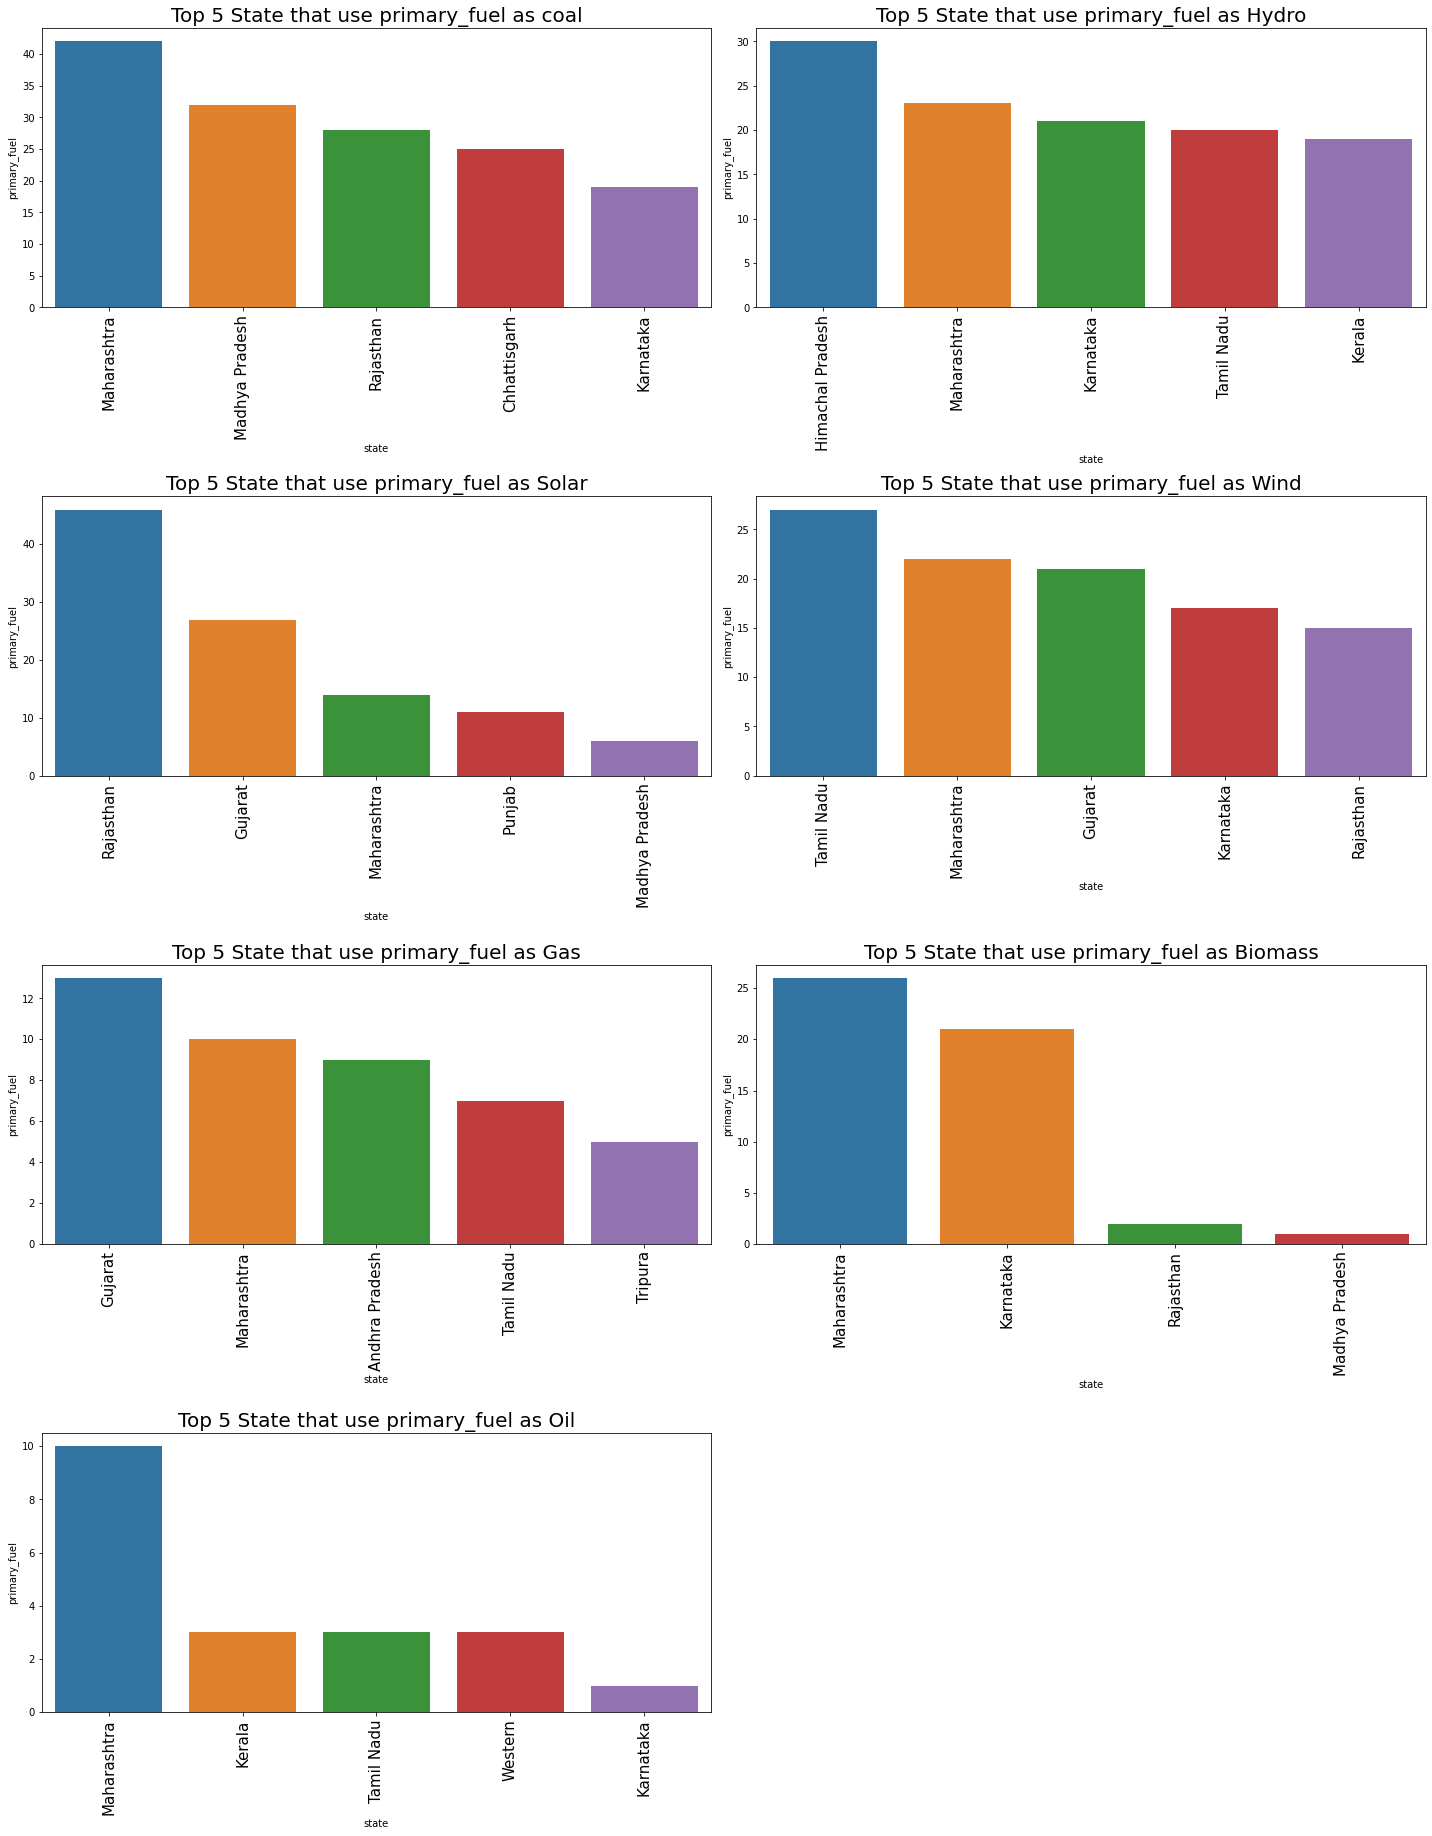

In [57]:
data51=data_Coal.groupby('state')['primary_fuel'].count()
data51=data51.reset_index()
data51=data51.sort_values(by=('primary_fuel'),ascending=False)

data61=data_Hydro.groupby('state')['primary_fuel'].count()
data61=data61.reset_index()
data61=data61.sort_values(by=('primary_fuel'),ascending=False)

data71=data_Solar.groupby('state')['primary_fuel'].count()
data71=data71.reset_index()
data71=data71.sort_values(by=('primary_fuel'),ascending=False)

data81=data_Wind.groupby('state')['primary_fuel'].count()
data81=data81.reset_index()
data81=data81.sort_values(by=('primary_fuel'),ascending=False)

data91=data_Gas.groupby('state')['primary_fuel'].count()
data91=data91.reset_index()
data91=data91.sort_values(by=('primary_fuel'),ascending=False)

data101=data_Biomass.groupby('state')['primary_fuel'].count()
data101=data101.reset_index()
data101=data101.sort_values(by=('primary_fuel'),ascending=False)

data111=data_Oil.groupby('state')['primary_fuel'].count()
data111=data111.reset_index()
data111=data111.sort_values(by=('primary_fuel'),ascending=False)

plt.figure(figsize=(20,50))
plt.subplot(8,2,1)
sns.barplot(x='state',y='primary_fuel',data=data51.head(5))
plt.title("Top 5 State that use primary_fuel as coal",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,2)
sns.barplot(x='state',y='primary_fuel',data=data61.head(5))
plt.title("Top 5 State that use primary_fuel as Hydro",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,3)
sns.barplot(x='state',y='primary_fuel',data=data71.head(5))
plt.title("Top 5 State that use primary_fuel as Solar",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,4)
sns.barplot(x='state',y='primary_fuel',data=data81.head(5))
plt.title("Top 5 State that use primary_fuel as Wind",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,5)
sns.barplot(x='state',y='primary_fuel',data=data91.head(5))
plt.title("Top 5 State that use primary_fuel as Gas",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,6)
sns.barplot(x='state',y='primary_fuel',data=data101.head(5))
plt.title("Top 5 State that use primary_fuel as Biomass",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,7)
sns.barplot(x='state',y='primary_fuel',data=data111.head(5))
plt.title("Top 5 State that use primary_fuel as Oil",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()

In [58]:
data['Country'].value_counts()

IN    860
GH     46
BT      1
NP      1
Name: Country, dtype: int64

In [59]:
data['Country']=data['Country'].replace({'IN':'INDIA','GH':'GHANA','NP':'NEPAL','BT':'BHUTAN'})

In [60]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,INDIA
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,INDIA
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,INDIA
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,INDIA
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,INDIA
904,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,INDIA
905,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,INDIA
906,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,INDIA


In [61]:
data['country'].unique()

array(['IND'], dtype=object)

In [62]:
data['country_long'].unique()

array(['India'], dtype=object)

In [63]:
data.drop(['country','country_long','name','source'],axis=1,inplace=True)

In [64]:
data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,Rajasthan,INDIA
1,WRI,98.0,24.7663,74.6090,Coal,WRI,Rajasthan,INDIA
2,WRI,39.2,21.9038,69.3732,Wind,WRI,Gujarat,INDIA
3,IND,135.0,23.8712,91.3602,Gas,WRI,Tripura,INDIA
4,IND,1800.0,21.9603,82.4091,Coal,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...
903,IND,1600.0,16.2949,77.3568,Coal,WRI,Karnataka,INDIA
904,WRI,3.0,12.8932,78.1654,Solar,Industry About,Karnataka,INDIA
905,WRI,25.5,15.2758,75.5811,Wind,WRI,Karnataka,INDIA
906,WRI,80.0,24.3500,73.7477,Coal,WRI,Rajasthan,INDIA


In [126]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,power_transform
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

#### Using ordinal encoder

In [66]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df
print(data['primary_fuel'].unique())
print("\n")
print(data['geolocation_source'].unique())
print("\n")
print(data['state'].unique())
print("\n")
print(data['Country'].unique())
print("\n")
print(data['gppd_idnr'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


['National Renewable Energy Laboratory' 'WRI' 'Industry About']


['Rajasthan' 'Gujarat' 'Tripura' 'Chhattisgarh' 'Tamil Nadu'
 'Himachal Pradesh' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Western' 'Uttar Pradesh' 'Andhra Pradesh' 'Kashmir' 'West Bengal'
 'Odisha' 'Bihar' 'Jharkhand' 'Assam' 'Kerala' 'Uttarakhand' 'Sikkim'
 'Western Region' 'Nagaland' 'Haryana' 'Andaman and Nicobar Islands' 'NCT'
 'Samchi' 'Telangana' 'Pondicherry' 'Meghalaya' 'Manipur'
 'Arunachal Pradesh' 'Goa' 'Mizoram']


['INDIA' 'GHANA' 'NEPAL' 'BHUTAN']


['WRI' 'IND']


In [67]:
data=ordinal_transform(data,['primary_fuel','geolocation_source','Country','gppd_idnr'])

In [68]:
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,1.0,2.5,28.1839,73.2407,6.0,1.0,Rajasthan,2.0
1,1.0,98.0,24.7663,74.6090,1.0,2.0,Rajasthan,2.0
2,1.0,39.2,21.9038,69.3732,7.0,2.0,Gujarat,2.0
3,0.0,135.0,23.8712,91.3602,2.0,2.0,Tripura,2.0
4,0.0,1800.0,21.9603,82.4091,1.0,2.0,Chhattisgarh,2.0


In [69]:
le=LabelEncoder()
data['state']=le.fit_transform(data['state'])

In [70]:
data['Capacity_as_per_fuel_type']=data['capacity_mw']/data['primary_fuel']
data['Capacity_as_per_fuel_type']=data['Capacity_as_per_fuel_type'].replace([np.inf,-np.inf],np.nan)
data['Capacity_as_per_fuel_type']=data['Capacity_as_per_fuel_type'].fillna(0)

In [71]:
print(data['primary_fuel'].unique())
print("\n")
print(data['geolocation_source'].unique())
print("\n")
print(data['state'].unique())
print("\n")
print(data['Country'].unique())
print("\n")
print(data['gppd_idnr'].unique())

[6. 1. 7. 2. 3. 0. 5. 4.]


[1. 2. 0.]


[24  7 29  5 27  9 11 14 15 23 33 30  1 12 32 21  4 10  3 13 31 26 34 20
  8  0 19 25 28 22 17 16  2  6 18]


[2. 1. 3. 0.]


[1. 0.]


In [72]:
X=data.drop(['capacity_mw','geolocation_source','Country'],axis=1)
y=data['capacity_mw']
x=X
Y=y

In [73]:
X

,gppd_idnr,latitude,longitude,primary_fuel,state,Capacity_as_per_fuel_type
0,1.0,28.1839,73.2407,6.0,24,0.416667
1,1.0,24.7663,74.6090,1.0,24,98.000000
2,1.0,21.9038,69.3732,7.0,7,5.600000
3,0.0,23.8712,91.3602,2.0,29,67.500000
4,0.0,21.9603,82.4091,1.0,5,1800.000000
...,...,...,...,...,...,...
903,0.0,16.2949,77.3568,1.0,11,1600.000000
904,1.0,12.8932,78.1654,6.0,11,0.500000
905,1.0,15.2758,75.5811,7.0,11,3.642857
906,1.0,24.3500,73.7477,1.0,24,80.000000


In [74]:
X.skew()

gppd_idnr                    0.294357
latitude                    -0.806374
longitude                   -3.602086
primary_fuel                 0.471141
state                        0.171695
Capacity_as_per_fuel_type    3.644208
dtype: float64

In [75]:
y_new=np.log(y)

In [76]:
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

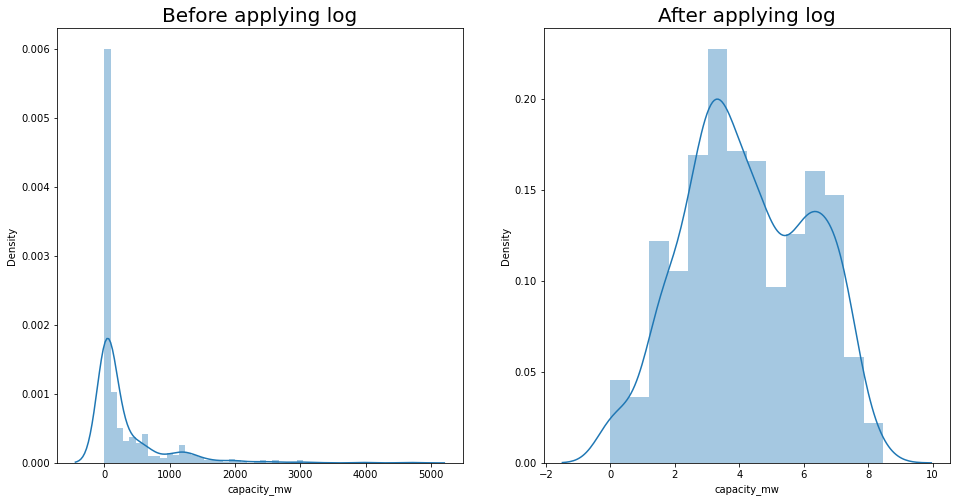

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=20)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=20)

# Feature Scaling

In [78]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new,columns=x.columns)

# Checking skewness

In [79]:
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.806374
longitude                   -3.602086
primary_fuel                 0.471141
state                        0.171695
Capacity_as_per_fuel_type    3.644208
dtype: float64

# Removing skewness

In [80]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [81]:
X_new.skew()

gppd_idnr                    0.294357
latitude                    -0.009853
longitude                    0.587490
primary_fuel                 0.090256
state                       -0.009498
Capacity_as_per_fuel_type    0.958059
dtype: float64

# Multivariate analysis

<AxesSubplot:>

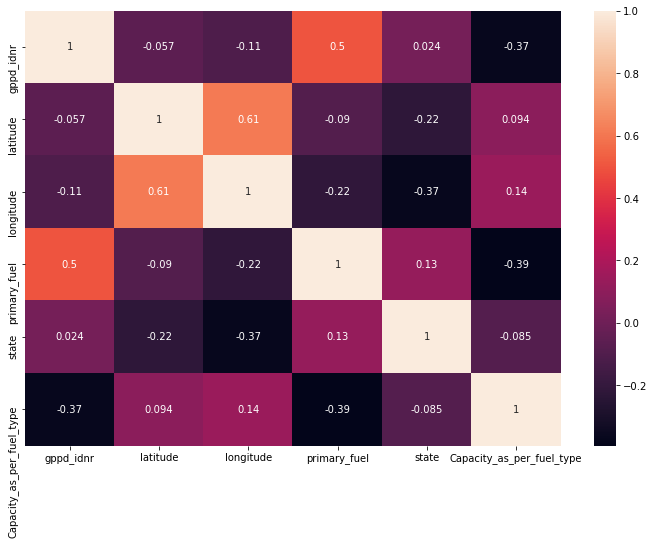

In [82]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

In [127]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

# Training Multiple models

In [84]:
models={
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

****** GradientBoostingRegressor ******




Score 0.99591896627092


MEAN_SQUARE_ERROR 2376.31452267805


MEAN_ABSOLUTE_ERROR 17.580277437339337


RMSE 48.74745657650304


R2_SCORE 0.99591896627092


MODEL PERFORMANCE CURVE


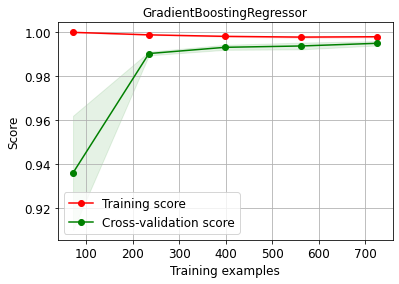

****** LGBMRegressor ******




Score 0.9955758901606321


MEAN_SQUARE_ERROR 26774.18414689234


MEAN_ABSOLUTE_ERROR 39.04290869119603


RMSE 163.62818872948617


R2_SCORE 0.9955758901606321


MODEL PERFORMANCE CURVE


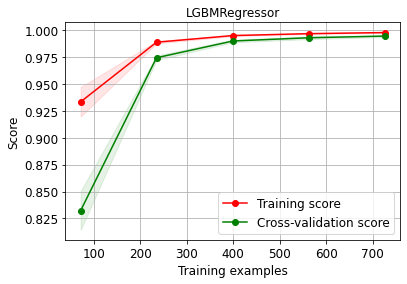

****** RandomForestRegressor ******




Score 0.9971200998797481


MEAN_SQUARE_ERROR 1575.541080071257


MEAN_ABSOLUTE_ERROR 10.525131587703813


RMSE 39.6930860487221


R2_SCORE 0.9971200998797481


MODEL PERFORMANCE CURVE


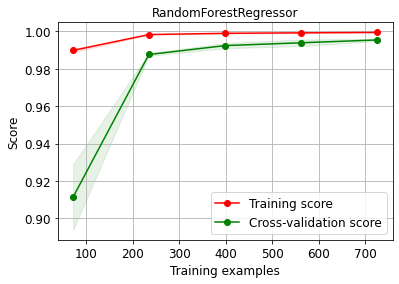

****** XGBRegressor ******




Score 0.9969554694137253


MEAN_SQUARE_ERROR 1317.7552321721087


MEAN_ABSOLUTE_ERROR 13.75771002658557


RMSE 36.30089850364738


R2_SCORE 0.9969554694137253


MODEL PERFORMANCE CURVE


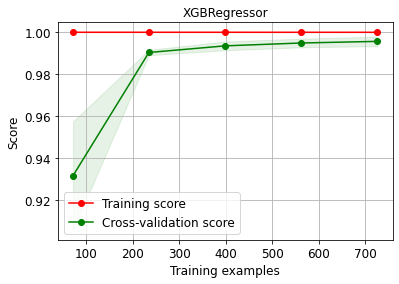

****** ExtraTreesRegressor ******




Score 0.9978277691948997


MEAN_SQUARE_ERROR 1077.1413177971908


MEAN_ABSOLUTE_ERROR 6.580055465280276


RMSE 32.8198311664943


R2_SCORE 0.9978277691948997


MODEL PERFORMANCE CURVE


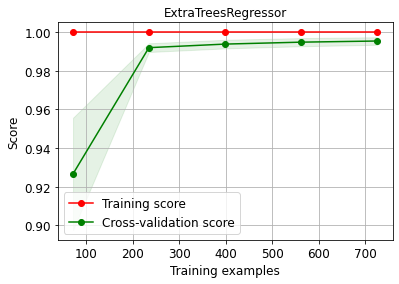

In [86]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("******",name,"******")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y_new,cv=5,scoring='r2').mean()
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("R2_SCORE",r2_score(y_test,y_pred))
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

In [87]:
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':rmse
})

In [88]:
models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,GradientBoostingRegressor,0.995919,99.489502,2376.314523,17.580277,32.819831
1,LGBMRegressor,0.995576,99.457470,26774.184147,39.042909,32.819831
2,RandomForestRegressor,0.997120,99.556077,1575.541080,10.525132,32.819831
3,XGBRegressor,0.996955,99.567740,1317.755232,13.757710,32.819831
4,ExtraTreesRegressor,0.997828,99.541384,1077.141318,6.580055,32.819831


In [89]:
ETREE=ExtraTreesRegressor()
ETREE.fit(X_train,y_train)

ExtraTreesRegressor()

In [90]:
ETREE.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperperameter Tuning

In [91]:
params={'bootstrap': [False,True],
 'criterion': ['mse','mae'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2,3],
}

In [92]:
grid=GridSearchCV(estimator=ETREE,param_grid=params,n_jobs=-1,cv=5)

In [93]:
grid.fit(X_new,y_new)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2, 3]})

In [94]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': 1}

In [95]:
grid.best_score_

0.9956194842237747

# Final model- Learning Curve

In [96]:
Etree=ExtraTreesRegressor(bootstrap= True,
 criterion= 'mse',
 max_depth= None,
 max_features= 'auto',
 max_samples= None)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

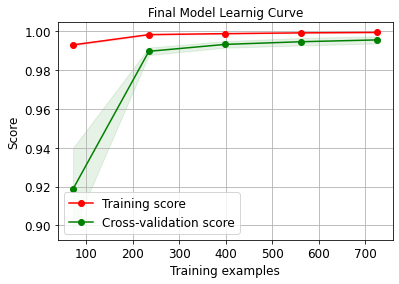

In [97]:
skplt.estimators.plot_learning_curve(Etree,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

# Final Model Metrics

In [99]:
Etree.fit(X_train,y_train)
y_pred=Etree.predict(X_test)
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("Model score",Etree.score(X_test,y_test))

Mean squared error 0.010636472291295685
Mean absolute error 0.04455097353882233
R2 Score 0.9969400569445355
Model score 0.9969400569445355


# CLASSIFICATION

In [102]:
X=data.drop(['primary_fuel'],axis=1)
y=data['primary_fuel']

In [103]:
x=X

# Checking outliers

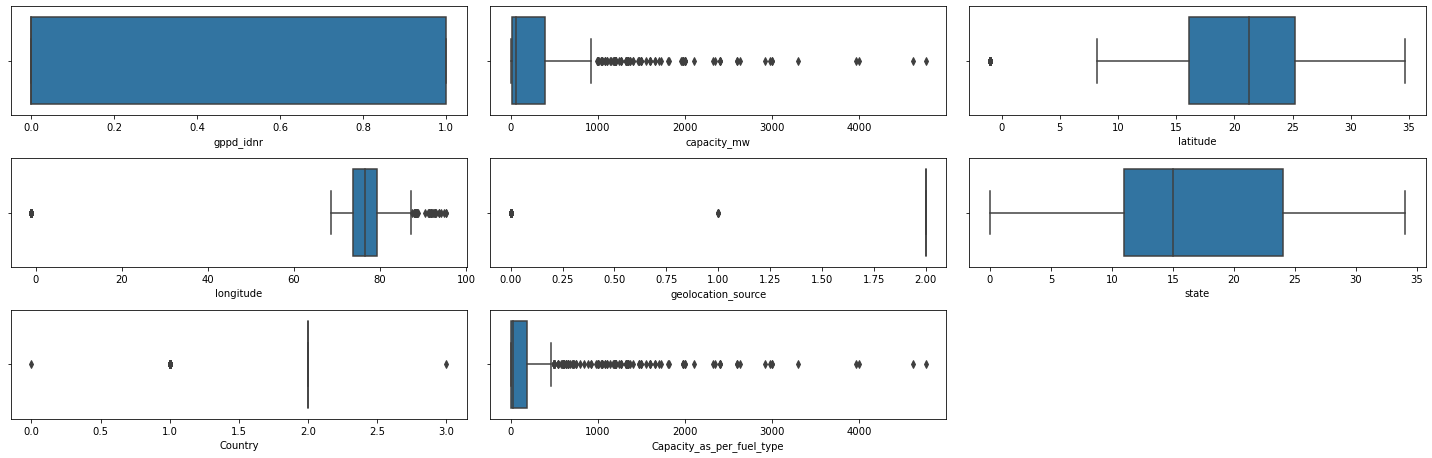

In [104]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

# Removing outliers using percentile method

In [105]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

# After removing outliers

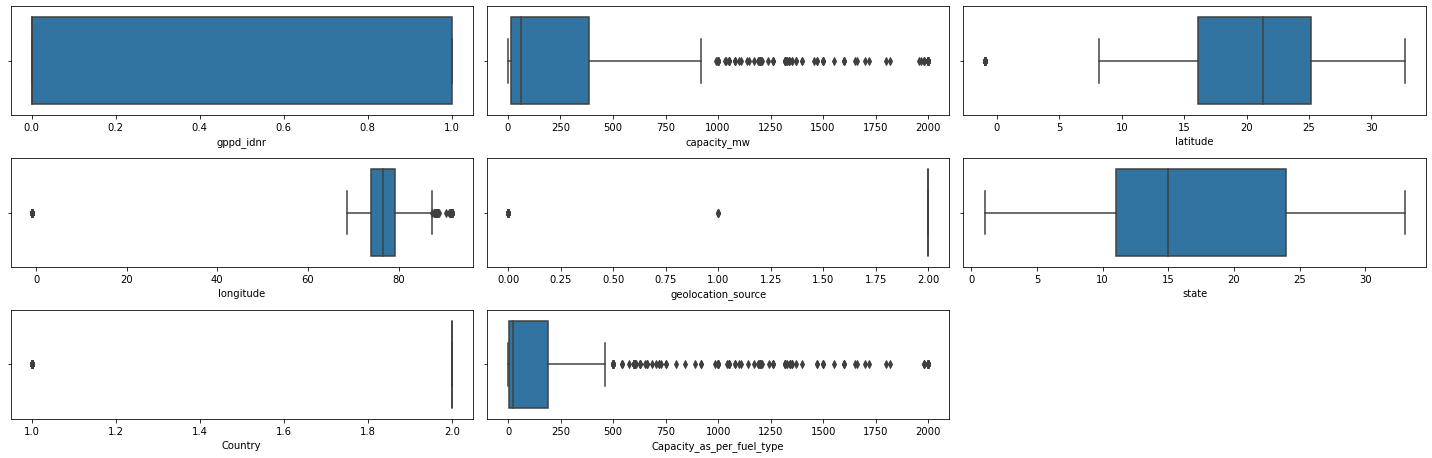

In [106]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [110]:
data['primary_fuel'].value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

In [111]:
X_new.skew()

gppd_idnr                    0.050618
capacity_mw                  2.114801
latitude                    -0.669240
longitude                   -3.870374
geolocation_source          -2.335731
state                        0.210757
Country                     -4.274297
Capacity_as_per_fuel_type    3.549812
dtype: float64

In [112]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [113]:
X_new.skew()

gppd_idnr                    0.028163
capacity_mw                  0.022901
latitude                    -0.254624
longitude                   -1.783624
geolocation_source          -2.303575
state                       -0.079212
Country                     -4.021528
Capacity_as_per_fuel_type    0.062546
dtype: float64

In [129]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

[20:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
XGB.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [133]:
param_class={
 'max_depth': [6,5,7],
 'n_jobs': [0,1,2],
 'num_parallel_tree': [1,2,3],
 'subsample': [1,2,3],
 'verbosity': [None,0,1,2]}

In [142]:
from yellowbrick.classifier.rocauc import roc_auc

In [146]:
xgb=XGBClassifier(max_depth= 5,
 n_jobs= 0,
 num_parallel_tree= 1,
 subsample= 1,
 verbosity= None)

In [147]:
import joblib 
joblib.dump(GRID_classifier,"classifier.obj")

['classifier.obj']